# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Bastiaans, Jessica Carmelita
- **Email:** jessicacarmelita2004@gmail.com
- **ID Dicoding:** bastiaans,_jessica_carmelita_xnw7

## Menentukan Pertanyaan Bisnis

Pertanyaan :
- Bagaimana tingkat penjualan perusahaan dalam tahun 2018?
- Produk apa yang paling diminati oleh customer?
- Bagaimana tingkat penilaian yang diberikan pelanggan dari yang terbaik hingga terburuk ?

RFM :
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("https://drive.google.com/uc?id=1HH8mjDnW5Dwn5vXJuQHx_3UD0OLBpkg_")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation_df = pd.read_csv("https://drive.google.com/uc?id=1N5hOzHF0WlJlauPNEuHRdDfwH_ZUgwM_")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items_df = pd.read_csv("https://drive.google.com/uc?id=1efNigdDC26MeClE8hdKSgxMXn3QET6pU")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv("https://drive.google.com/uc?id=11bsrqLhhRULTrNXEOR41spHMG4t7-B84")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv("https://drive.google.com/uc?id=16Qw36QrJCLmIUSW2P_nCipC2mkhMIwiC")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv("https://drive.google.com/uc?id=1kDxwjPkXdck6IMAgE85aUWTrNFKsSPP7")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_category_name_translation_df = pd.read_csv("https://drive.google.com/uc?id=1J_C04MYPlf5wLbPT8_Dwb0YKmZ_XQ7Bg")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products_df = pd.read_csv("https://drive.google.com/uc?id=17MuGtwSHbjirfuf_x8DHxiptLgOgT1ei")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("https://drive.google.com/uc?id=1AJ_mxCc1BHpvMrr87WGiVLwohiIEkI4q")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Melihat Informasi Mengenai Dataset berupa total data dan tipe data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [15]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [18]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Melakukan Check pada dataset apakah memiliki nilai null

In [20]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [22]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [24]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [26]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [27]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Melihat jumlah duplikasi data dalam Dataset

In [29]:
print("Jumlah duplikasi customers_df : ", customers_df.duplicated().sum())
print("Jumlah duplikasi geolocation_df : ", geolocation_df.duplicated().sum())
print("Jumlah duplikasi order_items_df : ", order_items_df.duplicated().sum())
print("Jumlah duplikasi order_payments_df : ", order_payments_df.duplicated().sum())
print("Jumlah duplikasi order_reviews_df : ", order_reviews_df.duplicated().sum())
print("Jumlah duplikasi  orders_df : ", orders_df.duplicated().sum())
print("Jumlah duplikasi product_category_name_translation_d : ", product_category_name_translation_df.duplicated().sum())
print("Jumlah duplikasi products_df : ", products_df.duplicated().sum())
print("Jumlah duplikasi sellers_df : ", sellers_df.duplicated().sum())

Jumlah duplikasi customers_df :  0
Jumlah duplikasi geolocation_df :  261831
Jumlah duplikasi order_items_df :  0
Jumlah duplikasi order_payments_df :  0
Jumlah duplikasi order_reviews_df :  0
Jumlah duplikasi  orders_df :  0
Jumlah duplikasi product_category_name_translation_d :  0
Jumlah duplikasi products_df :  0
Jumlah duplikasi sellers_df :  0


Melihat apakah ada value atau nilai yang aneh dalam dataset

In [30]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [31]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [32]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [33]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [34]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [35]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [36]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [37]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [38]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

Merubah tabel yang menggunakan tanggal type data object menjadi datetime

In [39]:
order_items_column=['shipping_limit_date']
for column in order_items_column:
    order_items_df[column]=pd.to_datetime(order_items_df[column])

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [40]:
order_reviews_column=[
    'review_creation_date',
    'review_answer_timestamp'
    ]
for column in order_reviews_column:
    order_reviews_df[column]=pd.to_datetime(order_reviews_df[column])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [41]:
orders_column = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

for column in orders_column:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengisi value pada bagian missing value

In [42]:
# fill missing value pada dataframe order_reviews dengan value dibawah ini

order_reviews_df["review_comment_title"].fillna(value="No Comment Title", inplace=True)
order_reviews_df["review_comment_message"].fillna(value="No Comment Message", inplace=True)

order_reviews_df.isna().sum()

# tidak melakukan fill atau drop pada missing value dataframe orders dan products
# karena bisa menghilangkan atau merubah keterangan data yang penting

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [43]:
# Melakukan Dropping pada data yang terindikasi memiliki duplikat data

geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [44]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [45]:
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### Explore order_payments_df

In [46]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [47]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore orders_df

In [48]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
63795,6b6484df41852bcee6a9b4d253379b1b,6efcca147ec1fcf0dac4e4275f8dd159,delivered,2017-08-10 14:31:26,2017-08-11 04:24:55,2017-08-11 19:16:03,2017-08-17 21:59:57,2017-09-01
65738,abdc23d84a4a4a01070f271f0c2917c0,356c9b7649ebd5cabf095172e8801a57,delivered,2017-04-04 05:57:10,2017-04-04 06:15:34,2017-04-04 15:59:46,2017-04-13 12:08:45,2017-04-25
31581,8021c3dc6a034e6f153035028d421c94,dbce625996b257695026f8bd3c5ee160,delivered,2018-04-17 00:15:54,2018-04-17 00:34:43,2018-04-17 19:11:24,2018-04-18 19:38:23,2018-05-03
43302,e94db86cfc0247d6bb6ae5f1307b4805,adf5f3855da286cef928bf33f6dd47b2,delivered,2018-01-07 15:52:33,2018-01-07 16:31:47,2018-01-08 20:19:39,2018-01-16 20:39:06,2018-02-08
10320,9573457d2b8a69c0136508b580c7f1d3,ddeefd33f4b6428f43b0d522bee1696a,delivered,2017-12-01 21:15:54,2017-12-01 21:32:36,2017-12-04 18:12:19,2017-12-16 18:32:54,2018-01-03
13380,e4c09ee4522daa0f32bd2e6b2f5ed048,cccd5136fc9518bcbf7eea735c6c2ae1,delivered,2018-08-04 22:22:59,2018-08-04 22:35:14,2018-08-08 09:48:00,2018-08-11 16:21:54,2018-08-16
47138,f5017de8931860a4492e26d3f22405b6,7b22f433873cb52f8be5468a64acbdcc,delivered,2018-01-16 18:16:35,2018-01-18 02:12:53,2018-01-19 16:58:49,2018-01-26 18:44:08,2018-02-06
98555,3af81bc8825a617ec4180b4f4a52e510,e52e2ce3e57c0a3653e6ff2bb04eae2c,delivered,2018-03-03 20:46:37,2018-03-03 20:56:09,2018-03-06 18:13:59,2018-03-19 13:33:07,2018-04-03
34914,92d79acdfb2573ac9a4560ae039355d3,0234b5cac2c4d895fdb1ef8d2956c84d,delivered,2018-05-31 16:39:30,2018-05-31 16:53:21,2018-06-04 15:04:00,2018-06-07 20:39:41,2018-07-04
60500,1e7bc4fa92ad71dd2603c7582ebeabf8,ca693ab312ae43e69370a1df11f190e3,delivered,2018-05-13 23:02:50,2018-05-13 23:11:59,2018-05-14 11:18:00,2018-05-22 19:26:42,2018-06-14


In [49]:
# membuat kolom baru yaitu delivery_time

delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
47130,bafef85881303806cc2d726bda04dfd7,55dbeedb7b2bf8d3059f319abe27202f,delivered,2018-08-22 21:34:37,2018-08-23 02:55:11,2018-08-24 14:55:00,2018-08-27 21:28:40,2018-08-31,3.0
23005,0e9a2f8bcef22eac543de56cd6c24b8f,0c1095f12f17b8a8814c3b52b94084b8,delivered,2017-12-14 16:00:11,2017-12-14 17:12:56,2017-12-15 18:22:00,2017-12-26 22:53:32,2018-01-12,11.0
89671,87c8028d4feed474234e7f1adfd5d9df,977bffb651e0eec87efab8bee30cb582,delivered,2018-03-09 12:35:23,2018-03-10 04:08:46,2018-03-13 19:32:30,2018-03-21 22:08:48,2018-04-02,8.0
39014,1bb86f8d6d2967cbf88b8a487d536e43,4737d20c64ded974df739986ba44244c,delivered,2018-06-07 12:44:20,2018-06-07 13:17:32,2018-06-08 16:55:00,2018-06-23 00:26:35,2018-07-17,14.0
40706,573de7df35639ded5e09b11ea2542d17,e175224a1568dc4b37ece75a8dcc1763,delivered,2018-01-03 19:20:34,2018-01-03 19:29:26,2018-01-05 17:53:00,2018-01-08 22:04:15,2018-01-19,3.0
83960,dec16faa1b0d9cf85ae3630def401cfb,43e4b82bff1bbd31273b414af1183c9d,delivered,2018-03-04 12:26:31,2018-03-06 03:49:40,2018-03-06 19:04:20,2018-04-02 18:31:44,2018-03-21,27.0
22548,dbf28dc3dffa48ddd066ad50c10c54e6,955f2d063cdfaae046329347c44d8b3c,delivered,2018-02-05 13:51:12,2018-02-05 14:10:41,2018-02-07 20:15:31,2018-02-27 20:13:21,2018-03-07,20.0
35551,bbab597cf5357b95cfff24d3ce830088,a74a322ca717a1cc1a81e9bb6c5f9f4b,delivered,2018-01-11 23:53:57,2018-01-12 00:07:46,2018-02-01 18:54:33,2018-02-14 19:42:22,2018-02-09,13.0
61244,f5dadfc0f0df0edb5369672f81eb7095,d5a0064fd4c9034929991d1aa2f5ce7b,delivered,2017-11-17 19:41:48,2017-11-18 02:35:30,2017-11-22 16:10:24,2017-12-02 18:38:16,2017-12-05,10.0
48108,dcd37d4b107e3f9e086e4b0ff4d087e3,20c1c62e6d76d1efd0a6b78b5477191f,delivered,2017-04-04 19:01:02,2017-04-04 19:15:13,2017-04-07 13:14:20,2017-04-20 12:25:50,2017-04-25,13.0


Memperoleh banyak informasi dengan proses penggabungan join atau merge

In [50]:
# Merging products_df dengan product_category_name_translation_df
# agar nama produk dapat dimengerti secara universal dengan bahasa Inggris

products_merge_df =pd.merge(
    left=products_df,
    right=product_category_name_translation_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

col = products_merge_df.pop('product_category_name_english')
products_merge_df.insert(2, col.name, col)
products_merge_df.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
# Mengetahui Customer dengan Order Product yang dilakukan

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [52]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)


customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [53]:
# Merging agar dapat melihat dari penilaian id custormer dan id order
customers_review_df = pd.merge(
    left=orders_customers_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_review_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4.0,No Comment Title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5.0,No Comment Title,No Comment Message,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5.0,No Comment Title,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5.0,No Comment Title,No Comment Message,2018-02-17,2018-02-18 13:02:51


In [54]:
customers_order_review_pay_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_order_review_pay_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Comment Title,No Comment Message,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Comment Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Comment Title,No Comment Message,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Comment Title,No Comment Message,2017-12-21,2017-12-22 01:10:39


In [55]:
customers_order_review_pay_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [56]:
# Gabungkan Seluruh DataFrame yang ada

merge1=pd.merge(
    left=orders_customers_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2=pd.merge(
    left=merge1,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge3=pd.merge(
    left=merge2,
    right=products_merge_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge4=pd.merge(
    left=merge3,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
all_df=pd.merge(
    left=merge4,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.describe()

,delivery_time,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score
count,115721.000000,119143.000000,119140.000000,119140.000000,119140.000000,118310.000000,118310.000000,118310.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000
mean,9.165398,35033.451298,1.094737,2.941246,172.735135,1.196543,120.646603,20.032387,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582
std,8.650795,29823.198969,0.730141,2.777848,267.776077,0.699489,184.109691,15.836850,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436
min,-16.000000,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000
25%,4.000000,11250.000000,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000
50%,7.000000,24240.000000,1.000000,2.000000,108.160000,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000
75%,12.000000,58475.000000,1.000000,4.000000,189.240000,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000
max,205.000000,99990.000000,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: **Bagaimana tingkat penjualan perusahaan dalam tahun 2018?**

In [57]:
# Melihat tingkat penjualan perusahaan dalam kurun waktu tertentu

monthly_orders_df  = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})

monthly_orders_df .index = monthly_orders_df .index.strftime('%B')
monthly_orders_df = monthly_orders_df .reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)

monthly_orders_df = monthly_orders_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
monthly_orders_df

,order_approved_at,order_count
12,September,5211
13,October,5630
15,December,6846
22,July,7234
21,June,7391
23,August,7672
17,February,8041
19,April,8075
20,May,8497
16,January,8541


In [58]:
month_sort = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_orders_df["int"] = monthly_orders_df["order_approved_at"].map(month_sort)
monthly_orders_df = monthly_orders_df.sort_values("int")
monthly_orders_df = monthly_orders_df.drop("int", axis=1)
monthly_orders_df

,order_approved_at,order_count
16,January,8541
17,February,8041
18,March,8705
19,April,8075
20,May,8497
21,June,7391
22,July,7234
23,August,7672
12,September,5211
13,October,5630


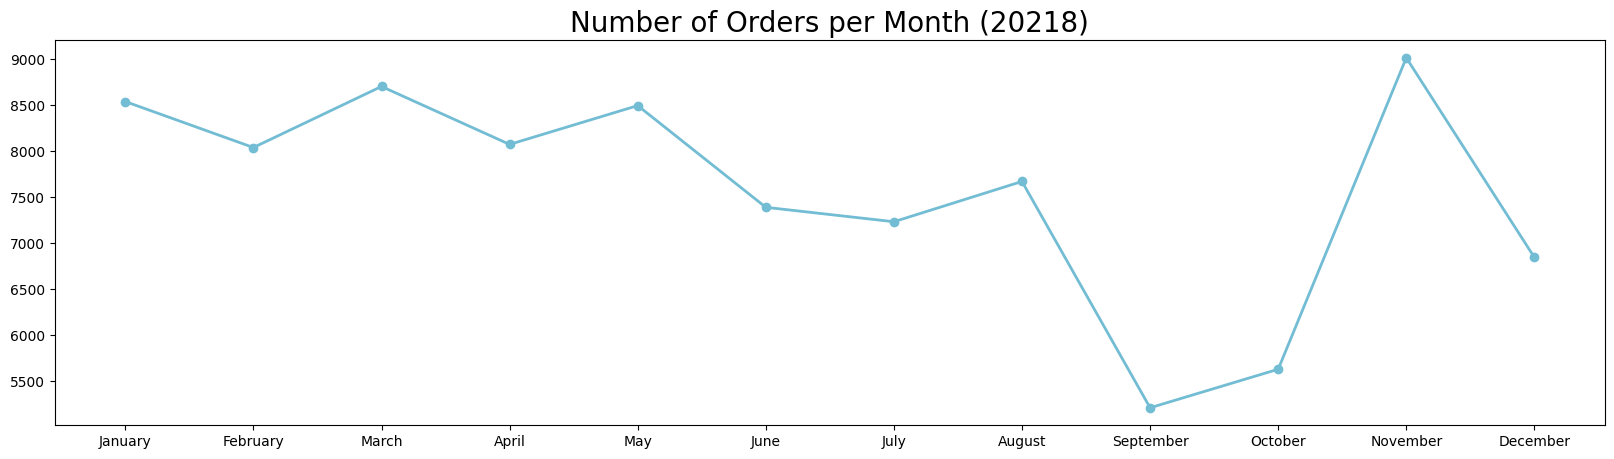

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(monthly_orders_df["order_approved_at"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (20218)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: **Produk apa yang paling diminati oleh customer?**


In [60]:
#menampung informasi terkait jumlah penjualan tiap produk
sort_order_items_df = all_df.groupby("product_category_name_english")['product_id'].count().sort_values(ascending=False).reset_index()
sort_order_items_df.head(20)

,product_category_name_english,product_id
0,bed_bath_table,11988
1,health_beauty,10032
2,sports_leisure,9004
3,furniture_decor,8832
4,computers_accessories,8150
5,housewares,7380
6,watches_gifts,6213
7,telephony,4726
8,garden_tools,4590
9,auto,4400


<ipython-input-61-bf15b1f14351>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sort_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-61-bf15b1f14351>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sort_order_items_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])


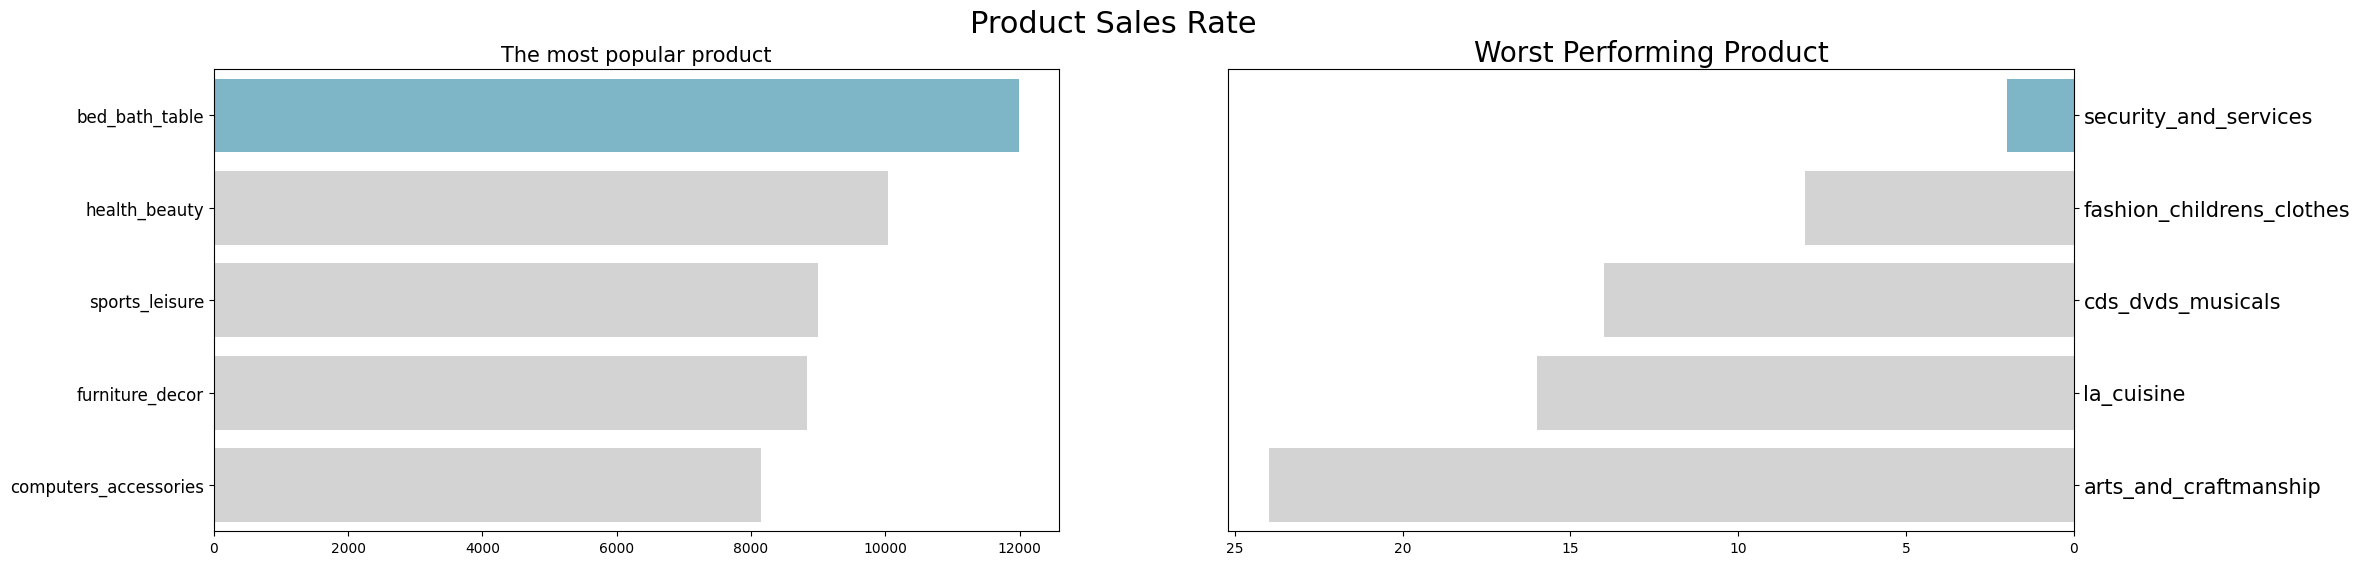

In [61]:
# Visualisasi kanvas kosong
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

# mengisi kanvas kosong tersebut dengan bar chart
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sort_order_items_df.head(5), palette=colors, ax=ax[0])
# ax[0] merupakan object untuk kanvas pertama (bagian kiri)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("The most popular product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="product_id", y="product_category_name_english", data=sort_order_items_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
# ax[1] merupakan object untuk kanvas kedua (bagian kanan)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=20)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Product Sales Rate", fontsize=22)
plt.show()

### Pertanyaan 3 : **Bagaimana tingkat penilaian yang diberikan pelanggan dari yang terbaik hingga terburuk ?**


In [62]:
#menampung informasi terkait penilaian dari customer
rating_counts = all_df['review_score'].value_counts().sort_values(ascending=False)
rating_indices = rating_counts.index
rating_values = rating_counts.values

max_score = rating_counts.idxmax()

<ipython-input-63-e7983c6bbb32>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_indices,


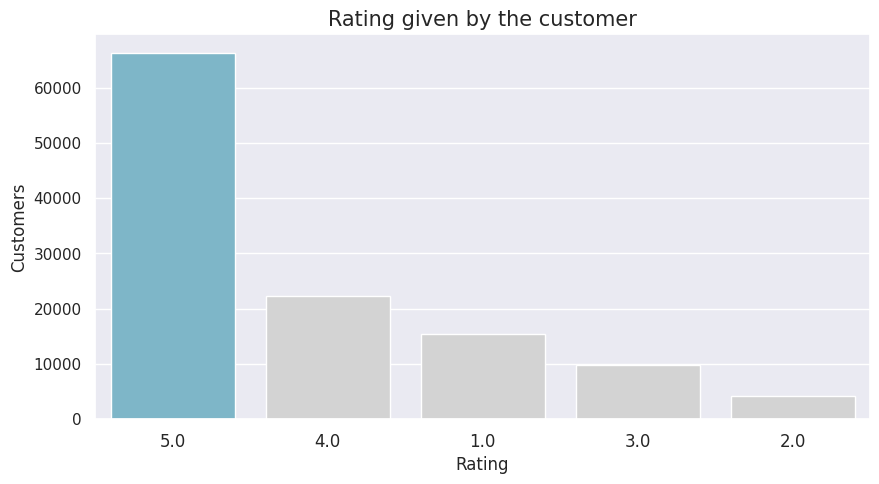

In [63]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_indices,
            y=rating_values,
            order=rating_indices,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_indices]
            )

plt.title("Rating given by the customer", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customers")
plt.xticks(fontsize=12)
plt.show()

### **RFM**

**Recency, Frequency, Monetary**

In [64]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Menghitung tanggal terbaru dan terlama dalam DataFrame
latest_date = all_df['order_purchase_timestamp'].max()
earliest_date = all_df['order_purchase_timestamp'].min()

# Menetapkan tanggal
now = dt.datetime(2018, 11, 3)

# Menghitung Recency, Frequency, dan Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_purchase_timestamp'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Membuat DataFrame baru dengan metrik yang dihitung
rfm_df = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})
# Mengurutkan DataFrame berdasarkan Recency secara menaik
rfm_sorted = rfm_df.sort_values(by='Recency', ascending=True)

rfm_sorted.head()

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,16,1,0.0
51713,856336203359aa6a61bf3826f7d84c49,17,1,0.0
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,30,1,0.0
74611,bf6181a85bbb4115736c0a8db1a53be3,32,1,0.0
15595,2823ffda607a2316375088e0d00005ec,34,1,0.0


<ipython-input-65-ee7ee9da4fc3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Recency", x="customer_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-65-ee7ee9da4fc3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-65-ee7ee9da4fc3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Frequency", x="customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-65-ee7ee9da4fc3>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

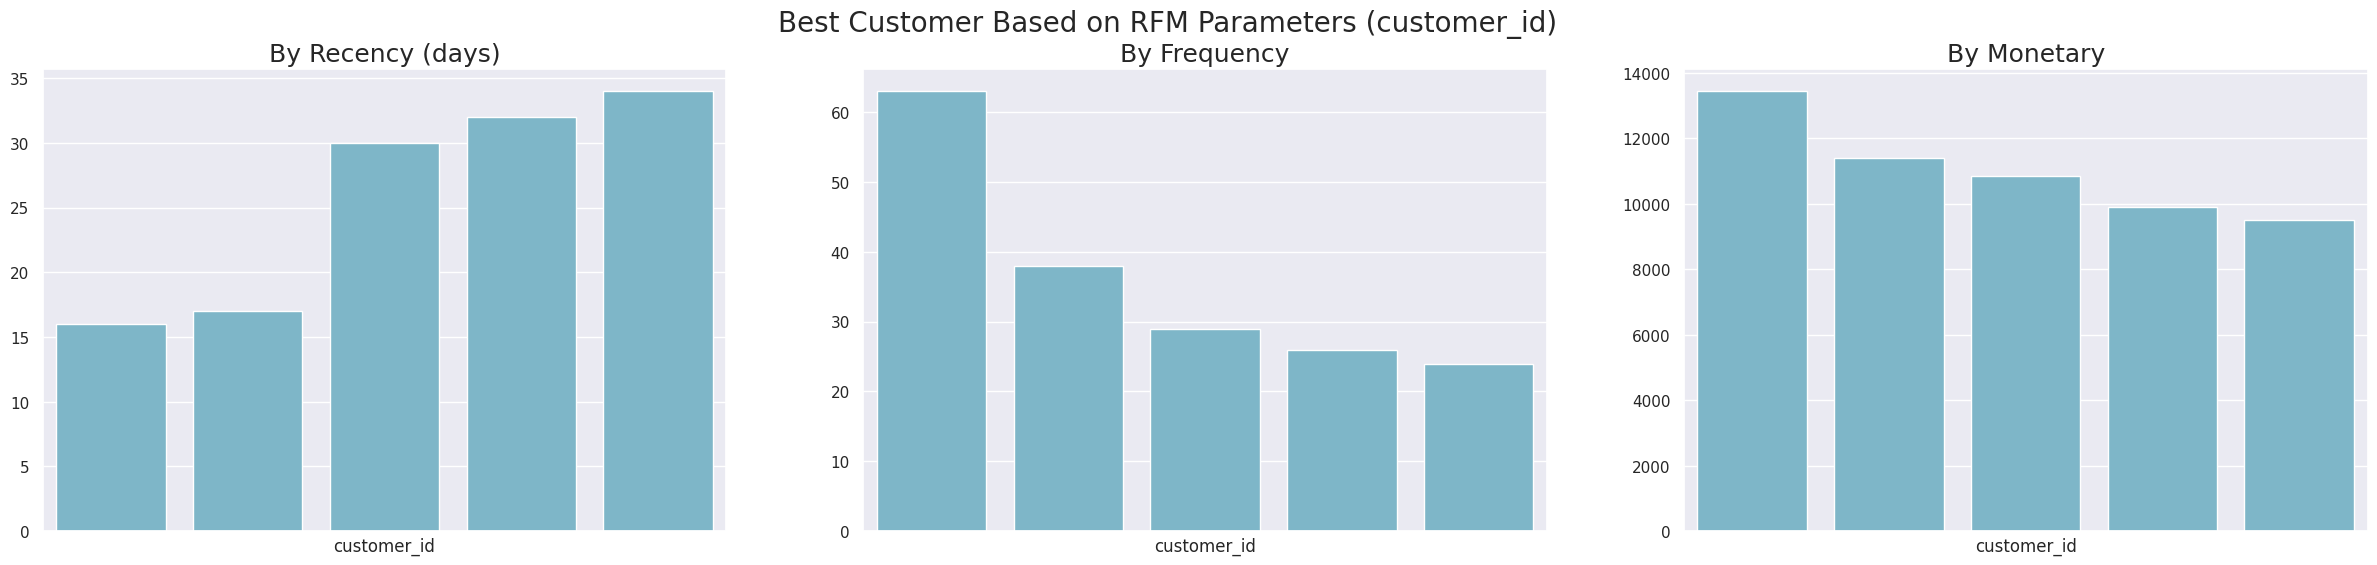

In [65]:
# mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="customer_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [66]:
all_df.to_csv("all_data.csv", index=False)

## Conclusion

**Pertanyaan :**

**- Bagaimana tingkat penjualan perusahaan dalam tahun 2018?**

Pembelian oleh pelanggan menunjukkan perubahan harga oleh mekanisme pasar yang signifikan, menandakan variasi yang terus-menerus dalam nilai pembelian setiap bulan. Analisis struktural data menyoroti bahwa terdapat perbedaan yang mencolok dalam struktur pembelian pelanggan. Puncak pembelian mencapai nilai maksimum pada bulan November, menandakan periode dengan aktivitas pembelian tertinggi. Sebaliknya, pada bulan September, terlihat penurunan yang mencolok dalam nilai pembelian, mencerminkan puncak pembelian minimum selama periode tertentu. Ini dapat diartikan sebagai indikasi perubahan pola pembelian pelanggan dari waktu ke waktu.

**- Produk apa yang paling diminati oleh customer?**
Berdasarkan pengamatan yang telah dilakukan dengan Bar Chart didapatkan hasil bahwa produk dengan penjualan dan peminatan dalam 3 teratas yaitu bed bath table, health beauty, dan sport leisure. Dan untuk security and services merupakan produk dengan minat paling sedikit.

**- Bagaimana tingkat penilaian yang diberikan pelanggan dari yang terbaik hingga terburuk ?**
Perusahaan mendapatkan tingkat penilaian yang baik karena rating 5 jauh mendominasi dalam visualisasi tingkat penilaian customer. Tetapi tetap didapatkan rating 4, rating 3, rating 2 dan rating 1 jika dibulatkan menyentuh rating dengan rata-rata 4.

**RFM :**

**- Kapan terakhir pelanggan melakukan transaksi?**

**- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?**

**- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?**

Untuk merespon tiga pertanyaan terakhir dalam analisis, kita dapat memanfaatkan teknik analisis yang lebih canggih, dikenal sebagai analisis RFM. Secara sederhana, analisis RFM adalah metode umum yang digunakan untuk mengelompokkan pelanggan ke dalam segmen-segmen berdasarkan tiga parameter utama, yaitu yaitu recency, frequency, dan monetary.

*   Recency: dengan melihat diagram dan dataframe yang dihasilkan dapat melihat kapan terakhir seorang pelanggan melakukan transaksi.
*   Frequency:dengan melihat diagram dan dataframe yang dihasilkan dapat mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
*   Monetary: dengan melihat diagram dan dataframe yang dihasilkan dapat mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.